# GST Registration Process 2024
This notebook demonstrates a chatbot-driven GST registration system with improved insights and applicability.

## Generate Synthetic Dataset
Creating a more dynamic and realistic dataset.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Generate synthetic dataset
np.random.seed(42)
num_records = 200

data = pd.DataFrame({
    'Client_ID': [f'Client_{i}' for i in range(1, num_records + 1)],
    'Query': np.random.choice(
        ['How to register?', 'Documents required?', 'Biometric Verification?', 'TRN issues?', 'General Query'],
        size=num_records
    ),
    'Response_Time': np.random.randint(1, 15, size=num_records),
    'Documents_Submitted': np.random.choice([True, False], size=num_records, p=[0.7, 0.3]),
    'Biometric_Completed': np.random.choice([True, False], size=num_records, p=[0.6, 0.4]),
    'TRN_Generation': np.random.choice(['Success', 'Pending', 'Rejected'], size=num_records, p=[0.6, 0.3, 0.1])
})

data.to_csv('Enhanced_GST_Registration_Dataset.csv', index=False)
print(data.head())


  Client_ID                    Query  Response_Time  Documents_Submitted  \
0  Client_1              TRN issues?              2                False   
1  Client_2            General Query              6                 True   
2  Client_3  Biometric Verification?              6                 True   
3  Client_4            General Query             11                 True   
4  Client_5            General Query              1                 True   

   Biometric_Completed TRN_Generation  
0                 True       Rejected  
1                 True        Success  
2                False        Pending  
3                False        Pending  
4                 True        Pending  


## Data Cleaning and Preparation
Ensuring data integrity and readiness for analysis.

In [12]:
# Check for missing values
print(data.isnull().sum())

Client_ID              0
Query                  0
Response_Time          0
Documents_Submitted    0
Biometric_Completed    0
TRN_Generation         0
Chatbot_Response       0
dtype: int64


In [6]:
# Ensure Response_Time within valid range
data['Response_Time'] = data['Response_Time'].clip(lower=1, upper=15)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Client_ID            200 non-null    object
 1   Query                200 non-null    object
 2   Response_Time        200 non-null    int32 
 3   Documents_Submitted  200 non-null    bool  
 4   Biometric_Completed  200 non-null    bool  
 5   TRN_Generation       200 non-null    object
dtypes: bool(2), int32(1), object(3)
memory usage: 6.0+ KB
None


## Exploratory Data Analysis (EDA)
Visualizing key metrics in the dataset.

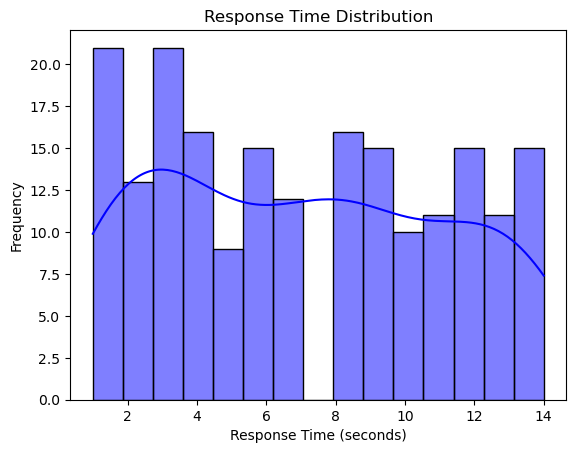

In [7]:

# Response Time Distribution
sns.histplot(data['Response_Time'], kde=True, bins=15, color='blue')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

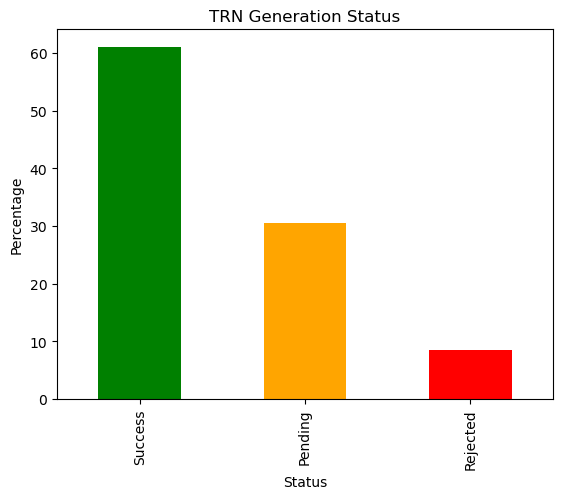

In [8]:
# TRN Generation Status
trn_status = data['TRN_Generation'].value_counts(normalize=True) * 100
trn_status.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('TRN Generation Status')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.show()


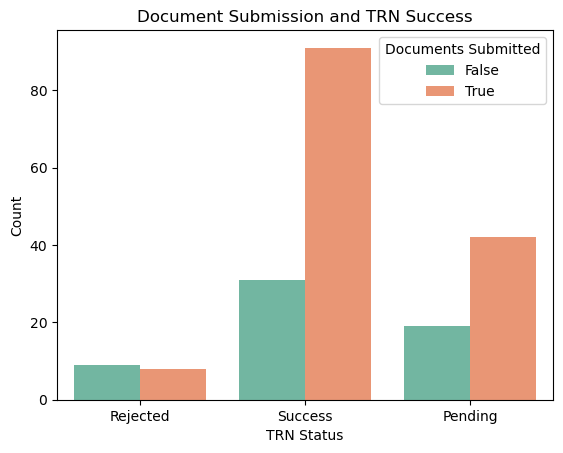

In [9]:
# Document Submission vs. TRN Success
sns.countplot(data=data, x='TRN_Generation', hue='Documents_Submitted', palette='Set2')
plt.title('Document Submission and TRN Success')
plt.xlabel('TRN Status')
plt.ylabel('Count')
plt.legend(title='Documents Submitted')
plt.show()

## Chatbot Simulation
Handling GST-related queries with chatbot logic.

In [10]:

def chatbot_response(query):
    responses = {
        'How to register?': 'Visit the GST portal and register.',
        'Documents required?': 'You need PAN, Aadhaar, and Address Proof.',
        'Biometric Verification?': 'Depends on your state. Please check local rules.',
        'TRN issues?': 'Ensure all documents are valid and resubmit if needed.',
        'General Query': 'Please visit the FAQ section on the GST portal.'
    }
    return responses.get(query, 'Query not recognized.')

In [11]:
data['Chatbot_Response'] = data['Query'].apply(chatbot_response)
print(data[['Query', 'Chatbot_Response']].head())

                     Query                                   Chatbot_Response
0              TRN issues?  Ensure all documents are valid and resubmit if...
1            General Query    Please visit the FAQ section on the GST portal.
2  Biometric Verification?   Depends on your state. Please check local rules.
3            General Query    Please visit the FAQ section on the GST portal.
4            General Query    Please visit the FAQ section on the GST portal.


## Summary

This project demonstrates a chatbot-based GST registration system that simulates the following:
1. Resolving user queries with predefined responses.
2. Tracking document submissions and biometric verification stages.
3. Analyzing response times and TRN success rates.

Real-World Applicability:
- Reduces human effort in query handling and process tracking.
- Improves accuracy and efficiency of the registration process.
- Offers seamless user experience with automation.
